#### Data encoding methods

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Product': ['Laptop', 'Tablet', 'Phone', 'Monitor', 'Laptop', 'Phone', 'Monitor', 'Tablet', 'Laptop', 'Phone'],
    'Size': ['Small', 'Medium', 'Small', 'Large', 'Medium', 'Small', 'Large', 'Medium', 'Large', 'Small'],
    'Color': ['Silver', 'Black', 'Blue', 'Black', 'Gray', 'Silver', 'White', 'Black', 'Silver', 'Gray'],
    'Country': ['USA', 'China', 'India', 'Japan', 'Germany', 'China', 'USA', 'India', 'Japan', 'Germany'],
    'Category': ['Premium', 'Budget', 'Premium', 'Standard', 'Premium', 'Budget', 'Standard', 'Budget', 'Premium', 'Premium'],
    'Supplier': ['Dell', 'Lenovo', 'Samsung', 'Sony', 'HP', 'Xiaomi', 'Dell', 'Samsung', 'Lenovo', 'Xiaomi'],
    'Price': [1200, 300, 900, 400, 1100, 500, 450, 320, 1250, 850]
}
df = pd.DataFrame(data)

print("Original Dataset Head:")
print(df.head(10))
print("-" * 50)



Original Dataset Head:
   ID  Product    Size   Color  Country  Category Supplier  Price
0   1   Laptop   Small  Silver      USA   Premium     Dell   1200
1   2   Tablet  Medium   Black    China    Budget   Lenovo    300
2   3    Phone   Small    Blue    India   Premium  Samsung    900
3   4  Monitor   Large   Black    Japan  Standard     Sony    400
4   5   Laptop  Medium    Gray  Germany   Premium       HP   1100
5   6    Phone   Small  Silver    China    Budget   Xiaomi    500
6   7  Monitor   Large   White      USA  Standard     Dell    450
7   8   Tablet  Medium   Black    India    Budget  Samsung    320
8   9   Laptop   Large  Silver    Japan   Premium   Lenovo   1250
9  10    Phone   Small    Gray  Germany   Premium   Xiaomi    850
--------------------------------------------------


In [5]:

# Create a copy of the DataFrame for encoding
df_encoded = df.copy()

# Ordinal Encoding (Column: Size) ---
# Define the explicit order
size_order = ['Small', 'Medium', 'Large']
# ordinal_mapping = [{'col': 'Size', 'mapping': {size: i+1 for i, size in enumerate(size_order)}}]

ord_encoder = OrdinalEncoder(categories=[size_order])
df_encoded['Size_Ordinal'] = ord_encoder.fit_transform(df[['Size']])

print("Ordinal Encoded 'Size' Column:")
print(df_encoded[['Size', 'Size_Ordinal']].head())
print("-" * 50)


Ordinal Encoded 'Size' Column:
     Size  Size_Ordinal
0   Small           0.0
1  Medium           1.0
2   Small           0.0
3   Large           2.0
4  Medium           1.0
--------------------------------------------------


In [4]:
print(df_encoded.head(10))
print("-" * 50)

   ID  Product    Size   Color  Country  Category Supplier  Price  \
0   1   Laptop   Small  Silver      USA   Premium     Dell   1200   
1   2   Tablet  Medium   Black    China    Budget   Lenovo    300   
2   3    Phone   Small    Blue    India   Premium  Samsung    900   
3   4  Monitor   Large   Black    Japan  Standard     Sony    400   
4   5   Laptop  Medium    Gray  Germany   Premium       HP   1100   
5   6    Phone   Small  Silver    China    Budget   Xiaomi    500   
6   7  Monitor   Large   White      USA  Standard     Dell    450   
7   8   Tablet  Medium   Black    India    Budget  Samsung    320   
8   9   Laptop   Large  Silver    Japan   Premium   Lenovo   1250   
9  10    Phone   Small    Gray  Germany   Premium   Xiaomi    850   

   Size_Ordinal  
0           0.0  
1           1.0  
2           0.0  
3           2.0  
4           1.0  
5           0.0  
6           2.0  
7           1.0  
8           2.0  
9           0.0  
------------------------------------------

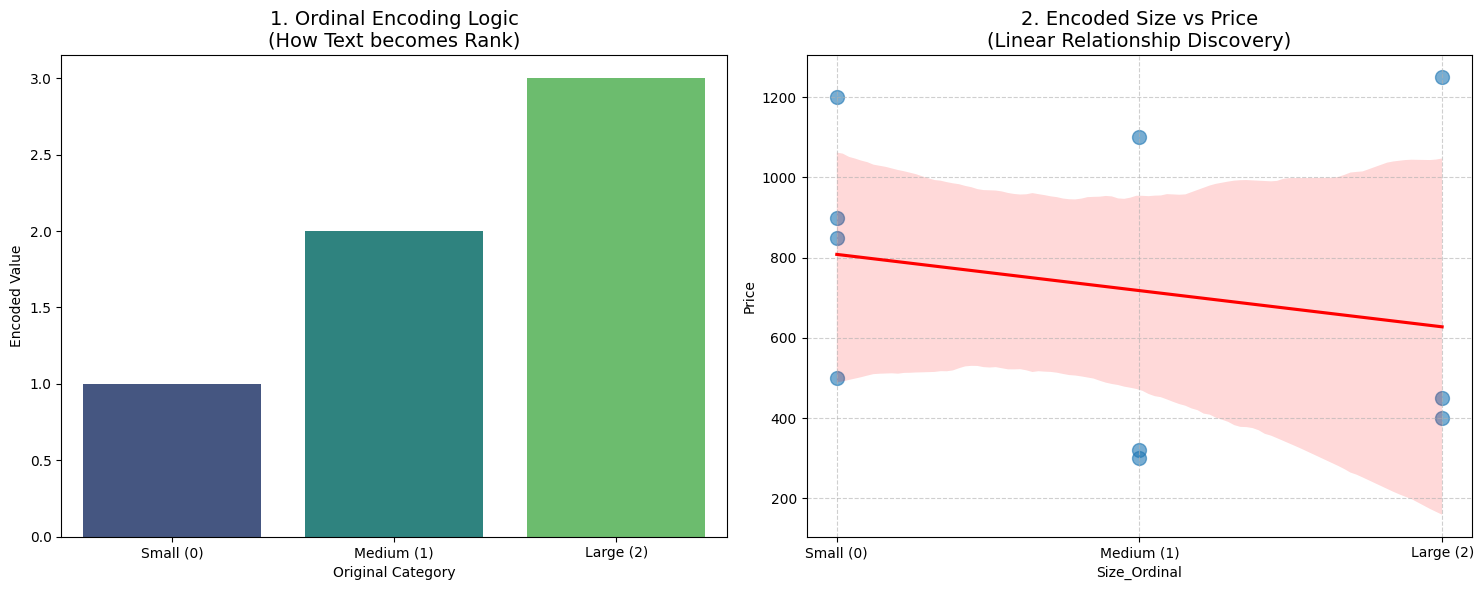

In [ ]:
# Visualization after encoding of values
#Target column is "Price" and we use all features to predict that

# Define as a DICTIONARY, not a list
mapping_dict = {'Small': 1, 'Medium': 2, 'Large': 3}
# Create the Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# --- Plot 1: The Transformation Logic ---
sb.barplot(x=list(mapping_dict.keys()), 
            y=list(mapping_dict.values()), 
            ax=ax1,
            hue=list(mapping_dict.keys()),
            palette="viridis")
ax1.set_title("1. Ordinal Encoding Logic\n(How Text becomes Rank)", fontsize=14)
ax1.set_ylabel("Encoded Value")
ax1.set_xlabel("Original Category")
ax1.set_xticks([0, 1, 2])
ax1.set_xticklabels(['Small (0)', 'Medium (1)', 'Large (2)'])


# --- Plot 2: Feature vs. Target (Price) ---# This proves how the rank (0, 1, 2) relates to the numerical Price
sb.regplot(x='Size_Ordinal', y='Price', data=df_encoded, ax=ax2, 
            scatter_kws={'s':100, 'alpha':0.6}, line_kws={"color": "red"})
ax2.set_title("2. Encoded Size vs Price\n(Linear Relationship Discovery)", fontsize=14)
ax2.set_xticks([0, 1, 2])
ax2.set_xticklabels(['Small (0)', 'Medium (1)', 'Large (2)'])
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# 尺寸（Size）与价格（Price）之间没有正向线性关系。
# 回归线向下 + 置信区间很宽 = 序数编码在这个数据集上对预测价格没有帮助。

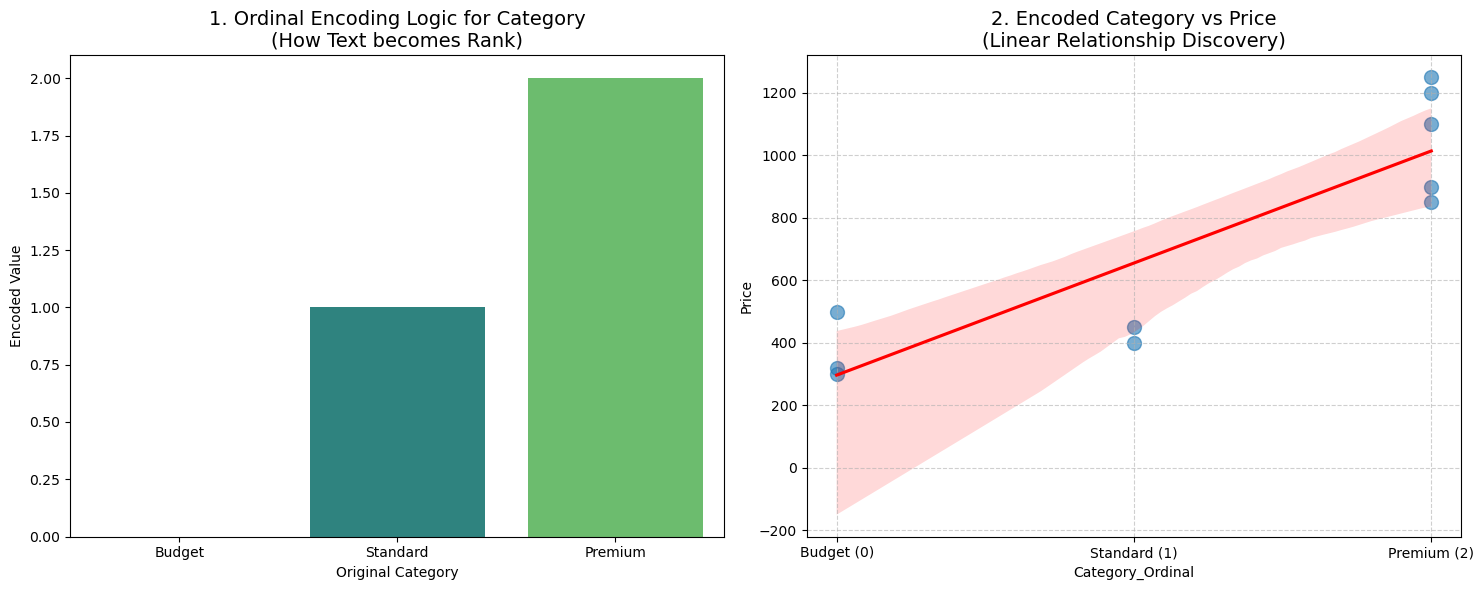

In [ ]:
# --- Ordinal Encoding for Category ---
# 定义顺序：Budget < Standard < Premium
category_order = ['Budget', 'Standard', 'Premium']

cat_encoder = OrdinalEncoder(categories=[category_order])
df_encoded['Category_Ordinal'] = cat_encoder.fit_transform(df[['Category']])

# 可视化
cat_mapping_dict = {cat: i for i, cat in enumerate(category_order)}
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: 编码逻辑
sb.barplot(x=list(cat_mapping_dict.keys()), 
            y=list(cat_mapping_dict.values()), 
            ax=ax1,
            hue=list(cat_mapping_dict.keys()),
            palette="viridis")
ax1.set_title("1. Ordinal Encoding Logic for Category\n(How Text becomes Rank)", fontsize=14)
ax1.set_ylabel("Encoded Value")
ax1.set_xlabel("Original Category")

# Plot 2: 编码后 vs Price
sb.regplot(x='Category_Ordinal', y='Price', data=df_encoded, ax=ax2, 
            scatter_kws={'s':100, 'alpha':0.6}, line_kws={"color": "red"})
ax2.set_title("2. Encoded Category vs Price\n(Linear Relationship Discovery)", fontsize=14)
ax2.set_xticks([0, 1, 2])
ax2.set_xticklabels(['Budget (0)', 'Standard (1)', 'Premium (2)'])
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# 对 Category 做序数编码是合理的，因为编码后的数值与目标变量（Price）呈现清晰的正向线性关系
# 说明序数编码成功捕捉了"Budget < Standard < Premium"的业务顺序。

In [6]:
# One-Hot Encoding (Column: Color) 

ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_cols = ohe_encoder.fit_transform(df[['Color']])
ohe_df = pd.DataFrame(ohe_cols, columns=[f'Color_{c}' for c in ohe_encoder.categories_[0]])

# Add to the encoded DataFrame
df_encoded = pd.concat([df_encoded, ohe_df], axis=1)

print("\n2.2. One-Hot Encoded 'Color' Columns (Partial):")
print(df_encoded.filter(regex='Color_').head())
print("-" * 50)



2.2. One-Hot Encoded 'Color' Columns (Partial):
   Color_Black  Color_Blue  Color_Gray  Color_Silver  Color_White
0          0.0         0.0         0.0           1.0          0.0
1          1.0         0.0         0.0           0.0          0.0
2          0.0         1.0         0.0           0.0          0.0
3          1.0         0.0         0.0           0.0          0.0
4          0.0         0.0         1.0           0.0          0.0
--------------------------------------------------


In [7]:
print(df_encoded.head(10))
print("-" * 50)

   ID  Product    Size   Color  Country  Category Supplier  Price  \
0   1   Laptop   Small  Silver      USA   Premium     Dell   1200   
1   2   Tablet  Medium   Black    China    Budget   Lenovo    300   
2   3    Phone   Small    Blue    India   Premium  Samsung    900   
3   4  Monitor   Large   Black    Japan  Standard     Sony    400   
4   5   Laptop  Medium    Gray  Germany   Premium       HP   1100   
5   6    Phone   Small  Silver    China    Budget   Xiaomi    500   
6   7  Monitor   Large   White      USA  Standard     Dell    450   
7   8   Tablet  Medium   Black    India    Budget  Samsung    320   
8   9   Laptop   Large  Silver    Japan   Premium   Lenovo   1250   
9  10    Phone   Small    Gray  Germany   Premium   Xiaomi    850   

   Size_Ordinal  Color_Black  Color_Blue  Color_Gray  Color_Silver  \
0           0.0          0.0         0.0         0.0           1.0   
1           1.0          1.0         0.0         0.0           0.0   
2           0.0          0.0  

In [8]:

#  Frequency Encoding for Color

freq_enc = df_encoded['Color'].value_counts(normalize=True)   # normalized freq
print(freq_enc)
df_encoded['Color_fe'] = df_encoded['Color'].map(freq_enc)

print(df_encoded[['Color', 'Color_fe']])

Color
Silver    0.3
Black     0.3
Gray      0.2
Blue      0.1
White     0.1
Name: proportion, dtype: float64
    Color  Color_fe
0  Silver       0.3
1   Black       0.3
2    Blue       0.1
3   Black       0.3
4    Gray       0.2
5  Silver       0.3
6   White       0.1
7   Black       0.3
8  Silver       0.3
9    Gray       0.2


### Category encoder https://contrib.scikit-learn.org/category_encoders/

In [9]:
import category_encoders as ce
encoder = ce.CountEncoder(cols=['Color'], normalize=True)

df_encoded['Color_fe'] = encoder.fit_transform(df_encoded['Color'])

print(df_encoded)



   ID  Product    Size   Color  Country  Category Supplier  Price  \
0   1   Laptop   Small  Silver      USA   Premium     Dell   1200   
1   2   Tablet  Medium   Black    China    Budget   Lenovo    300   
2   3    Phone   Small    Blue    India   Premium  Samsung    900   
3   4  Monitor   Large   Black    Japan  Standard     Sony    400   
4   5   Laptop  Medium    Gray  Germany   Premium       HP   1100   
5   6    Phone   Small  Silver    China    Budget   Xiaomi    500   
6   7  Monitor   Large   White      USA  Standard     Dell    450   
7   8   Tablet  Medium   Black    India    Budget  Samsung    320   
8   9   Laptop   Large  Silver    Japan   Premium   Lenovo   1250   
9  10    Phone   Small    Gray  Germany   Premium   Xiaomi    850   

   Size_Ordinal  Color_Black  Color_Blue  Color_Gray  Color_Silver  \
0           0.0          0.0         0.0         0.0           1.0   
1           1.0          1.0         0.0         0.0           0.0   
2           0.0          0.0  

In [10]:
# Binary Encoding (Column: Supplier) ---
# Good for medium/high cardinality; C=6 unique suppliers -> log2(6) ~ 3 features
#from category_encoders import BinaryEncoder
binary_encoder = ce.BinaryEncoder(cols=['Supplier'])
binary_cols = binary_encoder.fit_transform(df_encoded[['Supplier']])
#binary_cols = binary_cols.drop(columns=['Supplier_0']) # Drop the automatically added base column
print(binary_cols)

df_encoded = pd.concat([df_encoded, binary_cols.rename(columns={'Supplier_0': 'Supplier_B1', 'Supplier_1': 'Supplier_B2', 'Supplier_2': 'Supplier_B3'})], axis=1)

print(df_encoded.head(10))
print("-" * 50)


   Supplier_0  Supplier_1  Supplier_2
0           0           0           1
1           0           1           0
2           0           1           1
3           1           0           0
4           1           0           1
5           1           1           0
6           0           0           1
7           0           1           1
8           0           1           0
9           1           1           0
   ID  Product    Size   Color  Country  Category Supplier  Price  \
0   1   Laptop   Small  Silver      USA   Premium     Dell   1200   
1   2   Tablet  Medium   Black    China    Budget   Lenovo    300   
2   3    Phone   Small    Blue    India   Premium  Samsung    900   
3   4  Monitor   Large   Black    Japan  Standard     Sony    400   
4   5   Laptop  Medium    Gray  Germany   Premium       HP   1100   
5   6    Phone   Small  Silver    China    Budget   Xiaomi    500   
6   7  Monitor   Large   White      USA  Standard     Dell    450   
7   8   Tablet  Medium   Black

In [11]:
# Target Encoding (Column: Category) with Smoothing ---
# TargetEncoder inherently uses smoothing (Bayesian Mean) to prevent overfitting.

target_encoder = ce.TargetEncoder(cols=['Category'], min_samples_leaf=1, smoothing=0)# turning opff smooting factor as default is smoothing
# Target encoding requires both X (feature) and y (target) for fitting

df_encoded['Category_Target'] = target_encoder.fit_transform(df_encoded[['Category']], df_encoded['Price'])


print(df_encoded[['Category', 'Price', 'Category_Target']])
print(df_encoded.head(10))
print("-" * 50)


   Category  Price  Category_Target
0   Premium   1200      1060.000000
1    Budget    300       373.333333
2   Premium    900      1060.000000
3  Standard    400       425.000000
4   Premium   1100      1060.000000
5    Budget    500       373.333333
6  Standard    450       425.000000
7    Budget    320       373.333333
8   Premium   1250      1060.000000
9   Premium    850      1060.000000
   ID  Product    Size   Color  Country  Category Supplier  Price  \
0   1   Laptop   Small  Silver      USA   Premium     Dell   1200   
1   2   Tablet  Medium   Black    China    Budget   Lenovo    300   
2   3    Phone   Small    Blue    India   Premium  Samsung    900   
3   4  Monitor   Large   Black    Japan  Standard     Sony    400   
4   5   Laptop  Medium    Gray  Germany   Premium       HP   1100   
5   6    Phone   Small  Silver    China    Budget   Xiaomi    500   
6   7  Monitor   Large   White      USA  Standard     Dell    450   
7   8   Tablet  Medium   Black    India    Budget  S

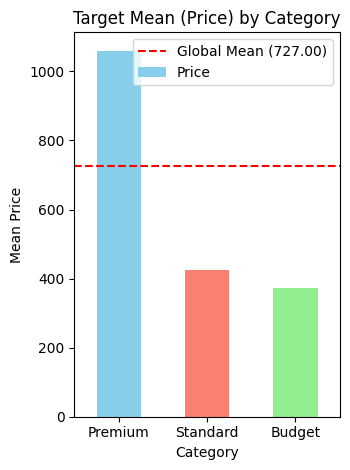

 **Insight: Target Encoding's Effectiveness**
Target Encoding successfully captures the Price hierarchy:
Category
Premium     1060.000000
Standard     425.000000
Budget       373.333333
Name: Price, dtype: float64

The encoded values directly reflect this order, making it a highly predictive feature for the model.


In [12]:
#Insight on Target Encoding (Mean Comparison)
category_means = df.groupby('Category')['Price'].mean().sort_values(ascending=False)
global_mean = df['Price'].mean()

plt.subplot(1, 2, 2)
ax = category_means.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.axhline(global_mean, color='red', linestyle='--', label=f'Global Mean ({global_mean:.2f})')
plt.title('Target Mean (Price) by Category')
plt.xlabel('Category')
plt.ylabel('Mean Price')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

print(" **Insight: Target Encoding's Effectiveness**")
print("Target Encoding successfully captures the Price hierarchy:")
print(category_means)
print("\nThe encoded values directly reflect this order, making it a highly predictive feature for the model.")

In [13]:
m = 3  # Your smoothing factor
global_mean = df['Price'].mean()  # 727.0

# Calculate Category Stats
agg = df.groupby('Category')['Price'].agg(['count', 'mean'])

#  Apply your Linear Smoothing Formula
# (count * mean + m * global_mean) / (count + m)
agg['smoothed'] = (agg['count'] * agg['mean'] + m * global_mean) / (agg['count'] + m)

print(f"Global Mean: {global_mean}")
print(agg[['mean', 'smoothed']])

Global Mean: 727.0
                 mean    smoothed
Category                         
Budget     373.333333  550.166667
Premium   1060.000000  935.125000
Standard   425.000000  606.200000


In [14]:

#this technique used sigmoid function
target_encoder1 = ce.TargetEncoder(cols=['Category'], min_samples_leaf=1, smoothing=3)
# Target encoding requires both X (feature) and y (target) for fitting

df_encoded['Category_Target_smoo'] = target_encoder1.fit_transform(df_encoded[['Category']], df_encoded['Price'])


#print(df_encoded[['Category', 'Price', 'Category_Target_smoo']])
print(df_encoded.head(10))
print("-" * 50)

   ID  Product    Size   Color  Country  Category Supplier  Price  \
0   1   Laptop   Small  Silver      USA   Premium     Dell   1200   
1   2   Tablet  Medium   Black    China    Budget   Lenovo    300   
2   3    Phone   Small    Blue    India   Premium  Samsung    900   
3   4  Monitor   Large   Black    Japan  Standard     Sony    400   
4   5   Laptop  Medium    Gray  Germany   Premium       HP   1100   
5   6    Phone   Small  Silver    China    Budget   Xiaomi    500   
6   7  Monitor   Large   White      USA  Standard     Dell    450   
7   8   Tablet  Medium   Black    India    Budget  Samsung    320   
8   9   Laptop   Large  Silver    Japan   Premium   Lenovo   1250   
9  10    Phone   Small    Gray  Germany   Premium   Xiaomi    850   

   Size_Ordinal  Color_Black  Color_Blue  Color_Gray  Color_Silver  \
0           0.0          0.0         0.0         0.0           1.0   
1           1.0          1.0         0.0         0.0           0.0   
2           0.0          0.0  

#### Hash encoding

In [15]:
hash_encoder = ce.HashingEncoder(cols=['Supplier'], n_components=3)

#Transform the data
df_hashed = hash_encoder.fit_transform(df_encoded['Supplier'])

# Combine with original data for visibility
df_encoded = pd.concat([df_encoded['Supplier'], df_hashed], axis=1)
print(df_encoded.head(10))

  Supplier  col_0  col_1  col_2
0     Dell      0      0      1
1   Lenovo      0      0      1
2  Samsung      0      1      0
3     Sony      0      0      1
4       HP      0      1      0
5   Xiaomi      0      1      0
6     Dell      0      0      1
7  Samsung      0      1      0
8   Lenovo      0      0      1
9   Xiaomi      0      1      0
